# Creating word vector Using word2vec with best pratices in preprocessing in NLP#

In this file we will  create a word2vec model trained on public-domain books from project [Gutenberg](https://www.gutenberg.org/)

## Word2vec ##
it is a technique to produce the vector for the words. 
To know more about it :
  1. [Tutorial from Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
  2. [Wondeful Visualization](https://lamyiowce.github.io/word2viz/)

You can use the pretrained model from Stanford and Google. But we will train model on small dataset 

In [2]:
#importing the libraries 
import nltk 
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [12]:
# new!
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


**Load Data**

In [3]:
# Download the dataset on which model will be trained
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/vedic/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
#Download the dataset for the tokenization in english language 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vedic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenize**

In [5]:
from nltk.corpus import gutenberg

In [7]:
#Tokenise the raw text in sentences 
sentences = gutenberg.sents()

**Preprocess the sentence**

In [10]:
sentences[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

### Thoughts about preprcessing ###
1. Remove puncuations ans lowering the charcters. She and she should be same
2. Lemmitization ans Stemming - enjoying, enjoy, enjoyed should be treated same. Although we might let it go in smaller datasets. Poter stemming algoritms work fine
3. a, an, the - don't serve any purpose 
4. handle Bi-grams - Ney York should be treated as single entity 

##### to lowercase: 

In [11]:
[w.lower() for w in sentences[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### remove stopwords and puntuation :

In [13]:
stpwrds = stopwords.words('english')+list(string.punctuation)

In [14]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
[w.lower() for w in gutenberg.sents()[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

##### Stemming :

In [17]:
stemmer = PorterStemmer()

In [18]:
[stemmer.stem(w.lower()) for w in gutenberg.sents()[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle Bi-grams

In [22]:
phrases = Phrases(sentences) # train detector

In [23]:
bigram = Phraser(phrases) # More efficent 

In [24]:
bigram.phrasegrams # We need to have a threshold on count so that we don't take invalid bi-grams

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

**Preprcess the corpus**

In [27]:
lower_sents =[]
for sent in sentences:
    lower_sents.append([w.lower() for w in sent if w not in stpwrds])

In [28]:
#We have to lower the bi-gram 
lower_bigram = Phraser(Phrases(lower_sents,min_count=32,threshold=64))

In [29]:
lower_bigram.phrasegrams

{(b',"', b'replied'): (300, 83.3878289505682),
 (b'ark', b'covenant'): (43, 101.71400977609586),
 (b'at', b'last'): (97, 64.50110412941581),
 (b'aye', b'aye'): (36, 70.3713),
 (b'beg', b'pardon'): (42, 582.6403378042722),
 (b'began', b'reign'): (54, 97.33909675634554),
 (b'book', b'chronicles'): (38, 220.46146616541353),
 (b'brown', b'boy'): (87, 137.31326365532803),
 (b'burnt', b'offering'): (184, 346.0499189585281),
 (b'burnt', b'offerings'): (86, 347.9485226117769),
 (b'buster', b'bear'): (142, 558.1399524118538),
 (b'came', b'pass'): (461, 82.9984843277899),
 (b'captain', b'benwick'): (56, 280.87663395975386),
 (b'captain', b'wentworth'): (196, 616.2965898046587),
 (b'charles', b'hayter'): (33, 107.04487374505628),
 (b'chief', b'priests'): (70, 155.78939580189805),
 (b'children', b'ammon'): (89, 193.51801945232444),
 (b'children', b'israel'): (648, 74.23010882609196),
 (b'chronicles', b'kings'): (34, 78.84739495798318),
 (b'colonel', b'brandon'): (132, 1527.1549479166667),
 (b'dare

In [31]:
clean_sents = []
for sent in lower_sents:
    clean_sents.append(lower_bigram[sent])

In [33]:
clean_sents[:4]

[['emma', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'rich',
  'comfortable',
  'home',
  'happy',
  'disposition',
  'seemed',
  'unite',
  'best',
  'blessings',
  'existence',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'world',
  'little',
  'distress',
  'vex']]

**Build the model and save**

In [34]:
# RUN THIS BLOCK WHEN YOU HAVE TO TRAIN THE MODEL OR YOU CAN USE THE SAVE MODEL #


model = Word2Vec(sentences=sentences, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
# Save the model for further use 
model.save('data/preprocessed_word2vec_gutenburg.w2v')

**Explore the model**

In [35]:
model = gensim.models.Word2Vec.load('data/preprocessed_word2vec_gutenburg.w2v')

In [36]:
model.wv['car']

array([ 0.14843759,  0.09452418, -0.27143386, -0.10998838, -0.1556538 ,
       -0.36035374, -0.09502248,  0.42239976, -0.10563863, -0.02664893,
        0.1094339 , -0.30425453,  0.11897614,  0.37692583,  0.17789124,
        0.00822134,  0.48720938, -0.47844452, -0.15052249, -0.36537141,
       -0.25341102,  0.43687451, -0.05806732,  0.29393137, -0.64554667,
        0.20629458, -0.02048782, -0.30983204, -0.34344506, -0.24997227,
        0.36712784, -0.39869338, -0.04204217,  0.26354393,  0.00480381,
       -0.02363203, -0.07758898,  0.55111539,  0.39037803, -0.12538446,
        0.51089197,  0.35195303, -0.30331168, -0.20578764, -0.04996829,
       -0.73196989,  0.58219075,  0.49820033,  0.45747861,  0.44734311,
       -0.11743741,  0.76568037, -0.20359786,  0.43057537, -0.22318433,
       -0.03322092, -0.10514105, -0.47346047, -0.11485782, -0.3884117 ,
        0.42836177,  0.11882999,  0.2204971 , -0.27156001], dtype=float32)

In [37]:
model.wv.most_similar('man')

[('philosopher', 0.6886225342750549),
 ('gentleman', 0.6851283311843872),
 ('sort', 0.6827453374862671),
 ('fellow', 0.681303858757019),
 ('one', 0.6701980829238892),
 ('figure', 0.6695838570594788),
 ('farmer', 0.6691818237304688),
 ('dog', 0.6683669090270996),
 ('he', 0.6594148874282837),
 ('Alligator', 0.6552086472511292)]

In [39]:
model.wv.most_similar(positive=['husband','woman'],negative=['man'])

[('wife', 0.7475318312644958),
 ('sister', 0.7453409433364868),
 ('daughter', 0.715785026550293),
 ('mother', 0.7075138092041016),
 ('nurse', 0.68196702003479),
 ('elder', 0.6650897264480591),
 ('conceived', 0.6600476503372192),
 ('widow', 0.6582821607589722),
 ('child', 0.6500381231307983),
 ('maid', 0.6494487524032593)]

Now we can see that wife is closest to **husband - man +wife**. But without preprocessing, We were getting something else. 

**Visualization**

We will use T-SNE method to visulaize multidimensional data in 2-D

In [40]:
X = model.wv[model.wv.vocab]

In [41]:
tsne = TSNE(n_components=2, n_iter=250) # 200 is minimum iter; default is 1000

In [42]:
X_2d = tsne.fit_transform(X)

**Store the results in data frame**

In [43]:
co_ord = pd.DataFrame(X_2d,columns=['x','y'])
co_ord['token'] = model.wv.vocab.keys()

In [44]:
co_ord.head(5)
co_ord.to_csv('data/preprocessed_word2vec_gutenburg_tsne.csv', index=False)

**See plot using the save model**

In [45]:
co_ord = pd.read_csv('data/preprocessed_word2vec_gutenburg_tsne.csv')

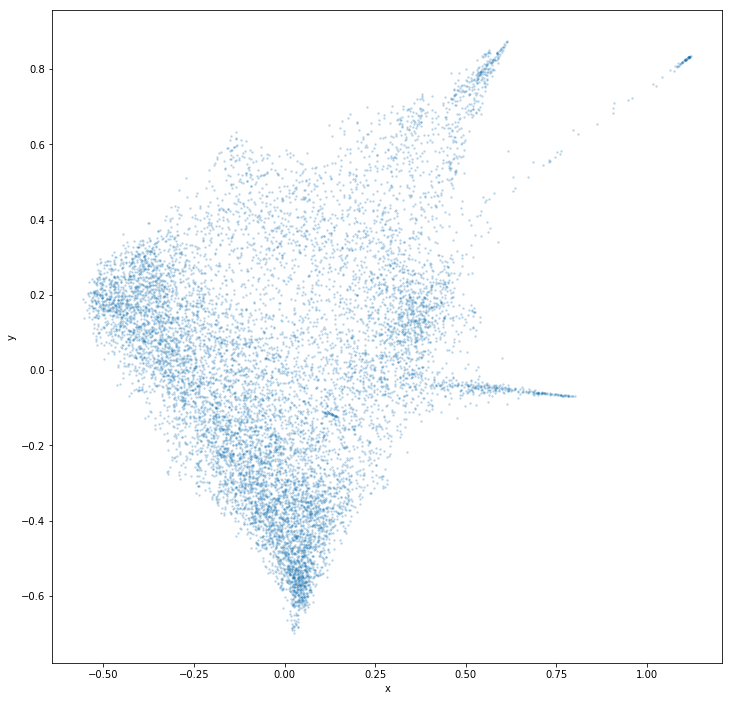

In [46]:
_ = co_ord.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

**Better Visulaization**

In [47]:
output_notebook() # for the Bokeh Plot

Loading BokehJS ...

In [48]:
sample_subset = co_ord.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=sample_subset.x, y=sample_subset.y, text=sample_subset.token)

In [49]:
show(p)